In [145]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [146]:
GrQc_df = pd.read_csv('data/CA-GrQc.txt', sep="\t",
                 header=0)
print('General Relativity and Quantum Cosmology dataframe')
GrQc_df.head()

General Relativity and Quantum Cosmology dataframe


,FromNodeId,ToNodeId
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931


In [147]:
AstroPh_df = pd.read_csv('data/CA-AstroPh.txt', sep="\t",
                 header=0)
print('Astro Physics collaboration network dataframe')
AstroPh_df.head()

Astro Physics collaboration network dataframe


,FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [148]:
# GrQc_graph= nx.from_pandas_edgelist(GrQc_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
GrQc_graph= nx.from_pandas_edgelist(GrQc_df, 'FromNodeId', 'ToNodeId')

In [149]:
# AstroPh_graph= nx.from_pandas_edgelist(AstroPh_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
AstroPh_graph= nx.from_pandas_edgelist(AstroPh_df, 'FromNodeId', 'ToNodeId')

In [150]:
if nx.is_connected(GrQc_graph):
    print('GrQc_graph is Connected')
else:
    print('GrQc_graph is Not Connected')

if nx.is_connected(AstroPh_graph):
    print('AstroPh_graph is Connected')
else:
    print('AstroPh_graph is Not Connected')

GrQc_graph is Not Connected
AstroPh_graph is Not Connected


In [151]:
shortest_path_GrQc_graph = nx.shortest_path_length(GrQc_graph)
shortest_path_GrQc_graph_df = pd.DataFrame(shortest_path_GrQc_graph)
shortest_path_GrQc_graph_df.head()


,0,1
0,3466,"{3466: 0, 18720: 1, 8579: 1, 10310: 1, 937: 1,..."
1,937,"{937: 0, 8579: 1, 4135: 1, 3466: 1, 14924: 1, ..."
2,5233,"{5233: 0, 3466: 1, 10310: 1, 13056: 2, 8579: 2..."
3,8579,"{8579: 0, 16258: 1, 4135: 1, 937: 1, 3466: 1, ..."
4,10310,"{10310: 0, 13056: 1, 9572: 1, 14982: 1, 4583: ..."


In [152]:
shortest_path_AstroPh_graph = nx.shortest_path_length(AstroPh_graph)
shortest_path_AstroPh_graph_df = pd.DataFrame(shortest_path_AstroPh_graph)
shortest_path_AstroPh_graph_df.head()



,0,1
0,84424,"{84424: 0, 61571: 1, 29829: 1, 125190: 1, 1308..."
1,276,"{276: 0, 55424: 1, 98944: 1, 125189: 1, 130825..."
2,1662,"{1662: 0, 117632: 1, 33040: 1, 59801: 1, 26413..."
3,5089,"{5089: 0, 84424: 1, 97101: 1, 30222: 2, 51730:..."
4,6058,"{6058: 0, 92163: 1, 5638: 1, 100884: 1, 94235:..."


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

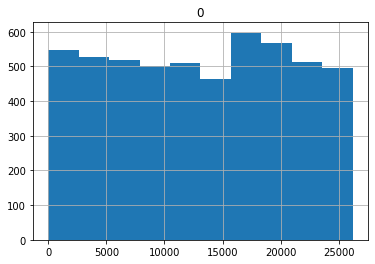

In [153]:
shortest_path_GrQc_graph_df.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

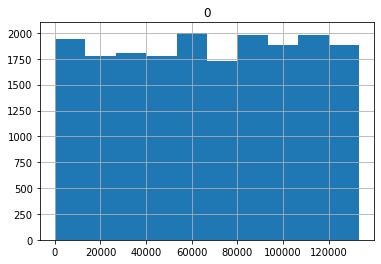

In [154]:
shortest_path_AstroPh_graph_df.hist()

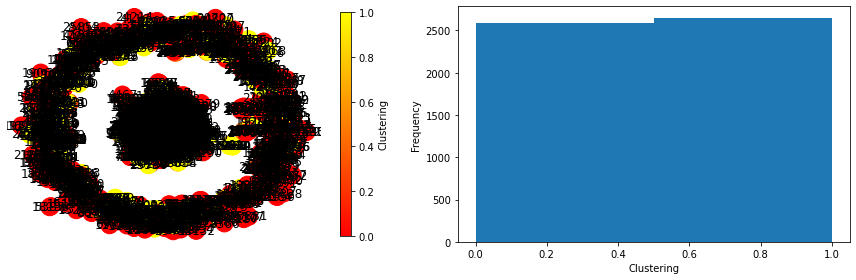

In [155]:
lcc = nx.clustering(GrQc_graph)
cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in GrQc_graph.nodes]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(GrQc_graph, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
ax2.hist(lcc.values(), bins=2)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
lcc = nx.clustering(AstroPh_graph)
cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in AstroPh_graph.nodes]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(AstroPh_graph, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.80, ax=ax1)
ax2.hist(lcc.values(), bins=2)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
